In [52]:
using Plots

In [56]:
function read_input(filename)
    open(filename, "r") do f
        readlines(f)
    end
end

function runit(filename)
    instructions = read_input(filename)
    cycle = 1
    x = 1
    saved_cycles = []
    for instruction in instructions
        if (cycle - 20) % 40 == 0
            push!(saved_cycles, (cycle, x))
        end
        cycle += 1
        cmd = split(instruction, " ")
        if length(cmd) == 2
            if (cycle - 20) % 40 == 0
                push!(saved_cycles, (cycle, x))
            end
            cycle += 1
            x += parse(Int, cmd[2])
        end
    end
    sum(a * b for (a, b) in saved_cycles)
end

function draw(screen, cycle, x)
    i = (cycle - 1) ÷ 40
    j = (cycle - 1) % 40
    if j in [x - 1, x, x + 1]
        screen[i + 1, j + 1] = 0
    end
end

function runit2(filename)
    instructions = read_input(filename)
    screen = ones(Int, 6, 40)
    cycle = 1
    x = 1
    for instruction in instructions
        draw(screen, cycle, x)
        cycle += 1
        cmd = split(instruction, " ")
        if length(cmd) == 2
            draw(screen, cycle, x)
            cycle += 1
            x += parse(Int, cmd[2])
        end
    end
    heatmap(reverse(screen, dims=1), color=:grays, aspect_ratio=:equal, colorbar=false, size=(500, 200))
end


runit2 (generic function with 1 method)

In [57]:
runit("10_input.txt")

11780

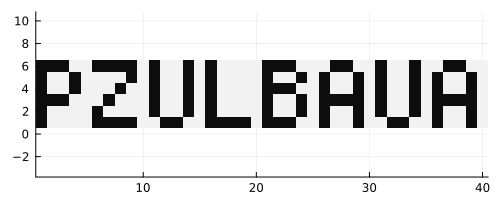

In [58]:
runit2("10_input.txt")